## Análise do algoritmo da **Busca Cega**

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

### Leitura e pré-processamento dos dados 

#### 1) WOW + HOT = TEA

In [26]:
wht2 = pd.read_csv('Data-BS/bs-wht-n=2.txt')
wht5 = pd.read_csv('Data-BS/bs-wht-n=5.txt')
wht10 = pd.read_csv('Data-BS/bs-wht-n=10.txt')
wht20 = pd.read_csv('Data-BS/bs-wht-n=20.txt')

wht = [wht2,wht5,wht10,wht20]
for d in wht:
    d.columns = ['T']

In [27]:
data = wht
nval = [2,5,10,20]
nsol = 66
ncomb = 105840
for (df,n) in zip(data,nval):
    df['Tnorm'] = 66*df['T']/ncomb
    #df['custo'] = n*df['T']/ncomb
wht[0].columns

Index(['T', 'Tnorm'], dtype='object')

#### 2) SEND + MORE = MONEY

In [28]:
smm2 = pd.read_csv('Data-BS/bs-smm-n=2.dat')
smm5 = pd.read_csv('Data-BS/bs-smm-n=5.dat')
smm10 = pd.read_csv('Data-BS/bs-smm-n=10.dat')
smm20 = pd.read_csv('Data-BS/bs-smm-n=20.dat')

smm = [smm2,smm5,smm10,smm20]
smm[0].columns

Index(['Unnamed: 0', 'N', 'T', 'Tnorm', 'custo'], dtype='object')

### Média custo computacional BS

In [20]:
print('Custo computacional para 1 solução WHT:')

for (data, n) in zip(wht,[2,5,10,20]):
    print('n = ', n ,'| mean = ', n*data['Tnorm'].mean(), ' | Desvio = ', n*data['Tnorm'].std(0))
    

Custo computacional para 1 solução WHT:
n =  2 | mean =  1.029124601802574  | Desvio =  1.0283167899151993
n =  5 | mean =  1.038172694820501  | Desvio =  1.0224241456552505
n =  10 | mean =  1.0407564565980438  | Desvio =  1.041163636798876
n =  20 | mean =  1.0640870209469913  | Desvio =  1.0475661004615349


A busca cega percorre em média uma fração proporcional de $\dfrac{1}{66}$ do espaço de soluções, tal fato se dá por possuir 66 soluções então a cada 1/66 do espaço ele encontra em média uma resposta.

In [21]:
print('Custo computacional SMM:')

for (data, n) in zip(smm,[2,5,10,20]):
    print('n = ', n ,'| mean = ', n*data['Tnorm'].mean(), ' | Desvio = ', n*data['Tnorm'].std(0))

Custo computacional SMM:
n =  2 | mean =  1.0172629062950347  | Desvio =  1.008707666500187
n =  5 | mean =  1.005860122567042  | Desvio =  1.012657053960628
n =  10 | mean =  1.0169794691082426  | Desvio =  1.012660962258393
n =  20 | mean =  1.0476603243437193  | Desvio =  1.057140472348095


### Gráficos 

In [22]:
#df = wht.copy()

def bs_semilog(df):
    hs = []
    bs = []
    for d in df:
        hi,bi = np.histogram(d['Tnorm'], 100, density =False)
        hs.append(hi)
        bs.append(bi)

    vlamb = [1/d['Tnorm'].mean() for d in df]
    nag = [2,5,10,20]
    
    for lb,n in zip(vlamb, nag): 
        print('N = {} | Lambda = {}'.format(n,lb))

    ########### ---------------------- ##########    
    cores = ['green','blue','red','black'][::-1]
    labels = ['$N = 2$','$N = 5$', '$N = 10$', '$N = 20$']
    fig,axs = plt.subplots(figsize = (10,6))

    for hist, bins, cor, n, label in zip(hs,bs,cores, nag, labels):
        axs.plot(bins[:-1], hist/sum(hist), 'D', markersize = 9, color = cor, label = label)
       
    axs.set_ylabel('$P$', fontsize = 25)
    axs.set_xlabel('$T/105840$', fontsize = 25)

    axs.legend(fontsize = 20)

    axs.set_yscale('log')

    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    
    #plt.savefig('../Gráficos/BS-wht.png')
    plt.show()

### Distribuição de probabilidades

<ul>
    <li>WOW + HOT = TEA

N = 2 | Lambda = 1.9433992701145024
N = 5 | Lambda = 4.8161544075906315
N = 10 | Lambda = 9.608395832284666
N = 20 | Lambda = 18.79545526474035


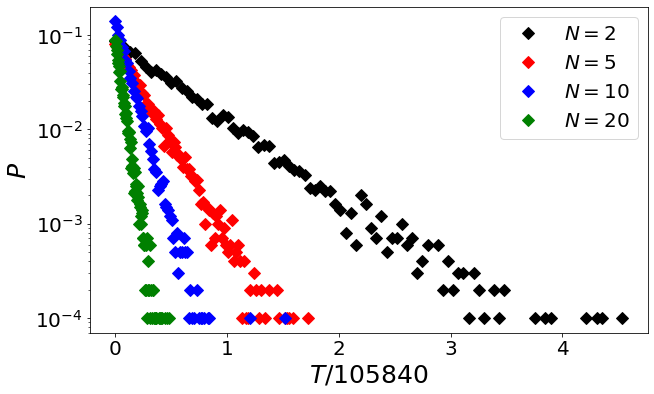

In [23]:
bs_semilog(wht.copy())
#bs_semilog(smm.copy())

<li> SEND + MORE = MONEY

N = 2 | Lambda = 1.9660600889146587
N = 5 | Lambda = 4.970870091996059
N = 10 | Lambda = 9.83304019772266
N = 20 | Lambda = 19.090156928991753


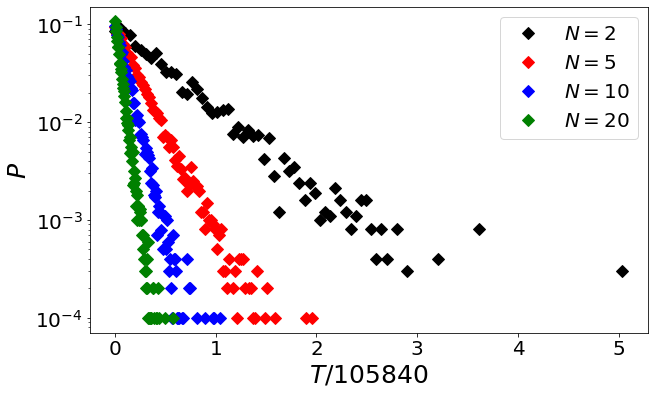

In [24]:
bs_semilog(smm.copy())